In [23]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.tree import DecisionTreeClassifier

In [24]:
mnist_path="../mnist_data/"

In [25]:
def load_mnist(path):
    #path:mnist data path
    mnist=fetch_openml('mnist_784',data_home=path)
    image=mnist['data']#shape:(70000,784)
    image=image/255
    label=mnist['target']#shape:(70000,)
    return image,label

In [26]:
image,label=load_mnist(mnist_path)
train_image=image[:60000,:]
test_image=image[60000:,:]
train_label=label[:60000]
test_label=label[60000:]

In [27]:
tree=DecisionTreeClassifier()

In [28]:
tree.fit(train_image,train_label)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [29]:
predict_label=tree.predict(test_image)

In [30]:
result_matrix=np.zeros((10,10))
for i in range(len(predict_label)):
    x=int(test_label[i])-1
    y=int(predict_label[i])-1
    result_matrix[x,y]=result_matrix[x,y]+1

0.8747


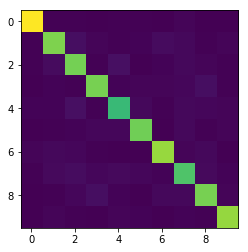

In [32]:
plt.imshow(result_matrix/10000)
print(tree.score(test_image,test_label))

In [33]:
precision=np.zeros(10)
recall=np.zeros(10)
for i in range(10):
    precision[i]=result_matrix[i,i]/sum(result_matrix[:,i])
    recall[i]=result_matrix[i,i]/sum(result_matrix[i,:])
print(precision)
print(recall)

[0.95426561 0.86234022 0.82279693 0.87589013 0.83409091 0.90435707
 0.89746094 0.81808732 0.85247525 0.91117764]
[0.95594714 0.8498062  0.85049505 0.87678208 0.82286996 0.88830898
 0.89396887 0.80800821 0.85332012 0.93163265]
